# Obje Tespiti

In [3]:
from mediapipe import solutions #el tespiti için görsel işleme görevleri
from mediapipe.framework.formats import landmark_pb2 # landmark_pb2 formatı cinsinden verileri almak için
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import wget

In [13]:
MARGIN=10 #metnin üst köşesinden elin sınırlarına olan mesafe
FONT_SIZE=1 #yazı tipi boyutu
FONT_THICKNESS=1 #yazı kalınlığı
HANDEDNESS_TEXT_COLOR = (88,205,54) #RGB formatında yeşil renk

In [5]:
#!wget -q https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task çalışmıyor
wget.download('https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task')

100% [..........................................................................] 7819037 / 7819037

'hand_landmarker (3).task'

In [4]:
base_options= python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [66]:
#!wget -q -0 data/el_ornek.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/women_hands.jpg
#wget.download('https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/women_hands.jpg')

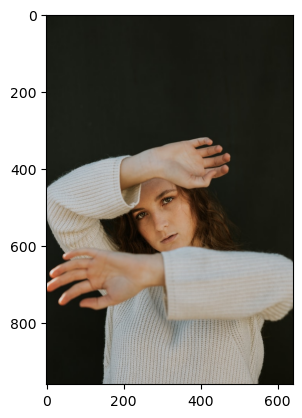

In [5]:
img = cv2.imread("el_ornek_1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [6]:
img.shape

(960, 640, 3)

In [7]:
image = mp.Image.create_from_file("el_ornek_1.jpg")
detection_result = detector.detect(image)

In [8]:
image

In [9]:
#detection_result

In [10]:
def draw_landmarks_on_image(rgb_image,detection_result):
    hand_landmarks_list = detection_result.hand_landmarks # tespit edilen elin işaretlemelerini içeriri
    handedness_list = detection_result.handedness #tespit edilen elin sağ veya sol olma durunu
    annotated_image = np.copy(rgb_image) # girdi görüntüsü kopyalanır.
    
    #tespit edilen elleri işaretlemek için bir döngü oluşturulur.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] # indexi kullanarak el işaretlemelerini alır.
        handedness = handedness_list[idx] #indexi kullanarak hangi elin tespit edildiği
        
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() # Landmark_pb2 formatında bir liste oluşturur
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x,y=landmark.y,z=landmark.z) for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks( #el işaretlemeleri görüntü üzerine çizilir
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style())
        
        
        height,width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x = int(min(x_coordinates)*width)
        text_y = int(min(y_coordinates)*height)-MARGIN
        
        cv2.putText(annotated_image,f"{handedness[0].category_name}",(text_x,text_y),cv2.FONT_HERSHEY_DUPLEX,
                   FONT_SIZE,HANDEDNESS_TEXT_COLOR,FONT_THICKNESS,cv2.LINE_AA)
        
        return annotated_image

In [11]:
image.numpy_view()

array([[[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       ...,

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [16, 16,  8],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [15, 15,  7],
        [15, 15,  7]]], dtype=uint8)

array([[[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       [[21, 24, 17],
        [21, 24, 17],
        [21, 24, 17],
        ...,
        [23, 24, 16],
        [23, 24, 16],
        [23, 24, 16]],

       ...,

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [16, 16,  8],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [16, 16,  8],
        [16, 16,  8]],

       [[15, 16, 10],
        [15, 16, 10],
        [15, 16, 10],
        ...,
        [15, 15,  7],
        [15, 15,  7],
        [15, 15,  7]]], dtype=uint8)

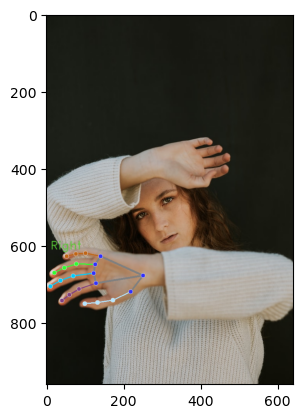

In [14]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)
annotated_image

In [83]:
image = mp.Image.create_from_file("el_ornek_2.jpg")
detection_result = detector.detect(image)

In [84]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=0, score=0.9869698882102966, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.13932213187217712, y=0.999625563621521, z=6.62074057800055e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.24264460802078247, y=0.9528952836990356, z=-0.05306704342365265, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3279273509979248, y=0.8380020260810852, z=-0.07162006199359894, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3831513226032257, y=0.7179696559906006, z=-0.08617129921913147, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4401511549949646, y=0.6285657286643982, z=-0.10138418525457382, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2658219039440155, y=0.6010321378707886, z=-0.04122306406497955, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.30657508969306946, y=0.4348279535770416, z=-0.07212378084659576, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.32989615

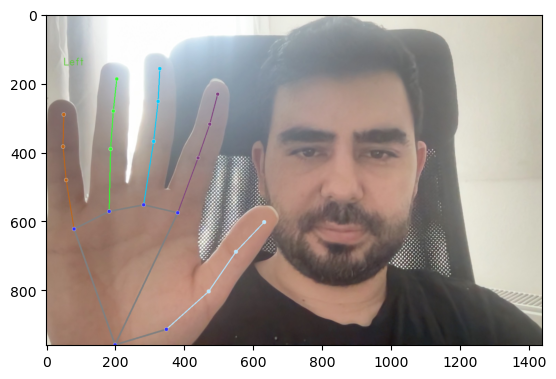

In [85]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)